In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
image_path = '/content/drive/MyDrive/Datasets/train (1).zip'

In [ ]:
from zipfile import ZipFile
with ZipFile(image_path, 'r') as z:
  z.extractall()

In [ ]:
import os
import cv2

X = []
X1=[]

# list all folders inside train directory
for i in os.listdir('train'):
      # read each image inside train directory one by one
      dummy = cv2.imread('train/' + i)
      dummy = cv2.cvtColor(dummy, cv2.COLOR_BGR2GRAY)
      dummy = cv2.resize(dummy, (128, 128))
      X1.append(dummy)
      dummy = dummy.flatten()
      X.append(dummy)


In [ ]:
len(X)

25000

In [ ]:
labels=[]
for dirname,_, filenames in os.walk('train'):
    for filename in filenames:
        label=filename.split('.')[0]
        labels.append(label)

In [ ]:
type(labels)

list

In [ ]:
labels[:5]

['cat', 'cat', 'cat', 'cat', 'cat']

In [ ]:
rand=np.random.randint(0,len(X),10)

In [ ]:
y=[0 if i=='cat' else 1 for i in labels]

In [ ]:
len(y)

25000

In [ ]:
rand=np.random.randint(0,len(X),12)

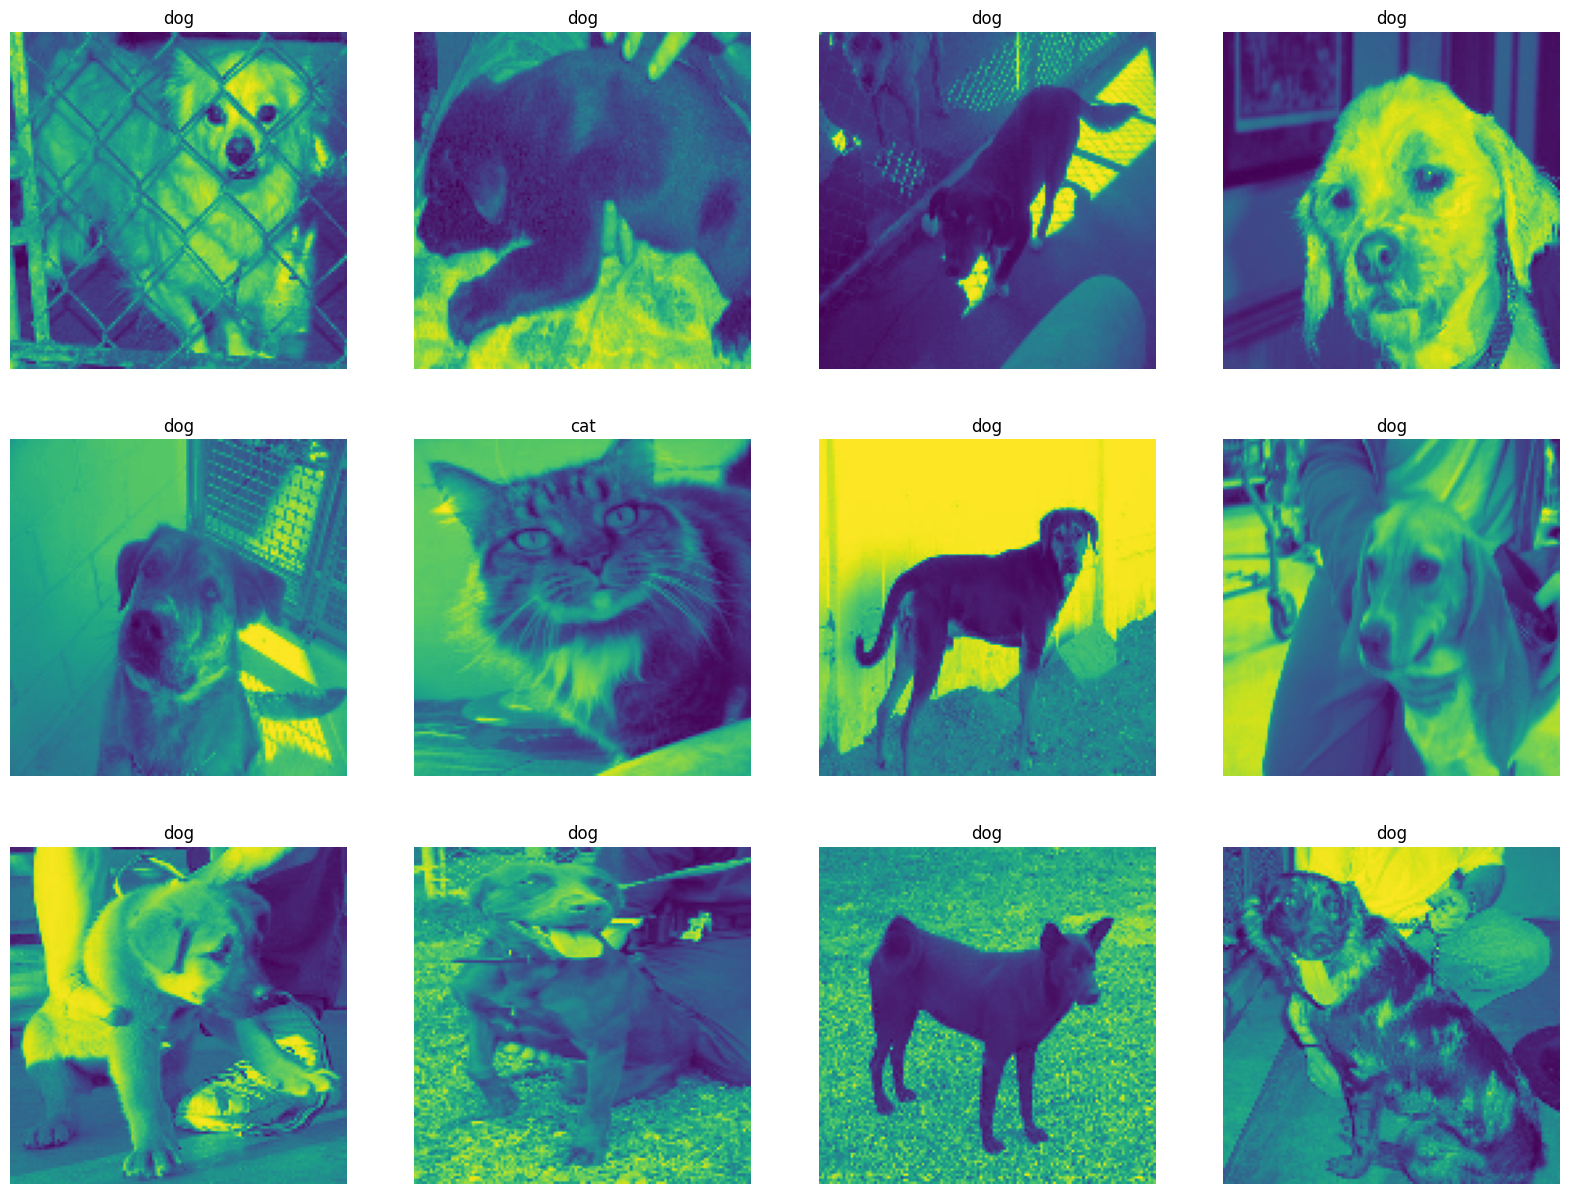

In [ ]:
plt.figure(figsize=(20, 15))
for i,j in enumerate(rand):
  plt.subplot(3,len(rand)//3,i+1)
  plt.imshow(X1[j])
  plt.title('{}'.format(labels[j]))
  plt.axis('off')

plt.show()

In [ ]:
X[:5]

[array([108, 107, 116, ..., 103, 111,  95], dtype=uint8),
 array([ 53,  50,  55, ..., 100,  56,  13], dtype=uint8),
 array([125, 122, 123, ..., 127, 139, 146], dtype=uint8),
 array([ 66,  69,  71, ..., 124, 125, 119], dtype=uint8),
 array([ 62,  57,  60, ..., 160, 149, 160], dtype=uint8)]

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X=X[:7000]
y=y[:7000]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, gamma='auto', class_weight='balanced', random_state=42)

svm_classifier.fit(X_train, y_train)

SVC(class_weight='balanced', gamma='auto', kernel='linear', random_state=42)

In [ ]:
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print('training accuracy:',accuracy_score(y_train, y_train_pred))
print('test accuracy:',accuracy_score(y_test, y_test_pred))

training accuracy: 1.0
test accuracy: 0.5252380952380953


In [ ]:
print(classification_report(y_test, y_test_pred, target_names=['cats', 'dogs']))

              precision    recall  f1-score   support

        cats       0.53      0.59      0.56      1081
        dogs       0.51      0.45      0.48      1019

    accuracy                           0.53      2100
   macro avg       0.52      0.52      0.52      2100
weighted avg       0.52      0.53      0.52      2100

